<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from ydata_profiling import ProfileReport

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Это псевдорандом, так что с одинаковым сидом у всех все 'рандомные' значения будут одинаковы, так можно проверить дз, сверив его с правильным решением

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [273]:
import pandas as pd

In [274]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [275]:
# Ваш код здесь
print("случайные 30 строк:\n",df_train.sample(30))

случайные 30 строк:
                                         name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   
132          Mercedes-Benz S-Class S 350 CDI  2017        5850000      47000   
6974  Fiat Grande P

In [276]:
print("Первые 5 строк:")
print(df_test.head())
print("\nПоследние 5 строк:")
print(df_test.tail())

Первые 5 строк:
                                     name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    

In [277]:
df_train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [278]:
missing_cols = df_train.columns[df_train.isnull().any()].tolist()
print("Колонки с пропущенными значениями:", missing_cols)

Колонки с пропущенными значениями: ['mileage', 'engine', 'max_power', 'torque', 'seats']


In [279]:
duplicates = df_train.duplicated().sum()
print(f"Количество явных дубликатов: {duplicates}")

Количество явных дубликатов: 985


In [280]:
profile = ProfileReport(df_train, title="Анализ цен автомобилей")

In [281]:
#profile
#profile.to_file("car_analysis_report.html")

Вывод случайных строк помогает понять как выглядят данные, увидеть их структуру, типы колонок. Но он не даёт сделать выводы о распределении, трендах, статистических закономерностях.

Метод duplicated находит явные дуюликаты (полное совпадение всех столбцов), этого недостаточно так как есть еще частичные дубликаты (например отличается 1 колонка).

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

**У нас есть пропущенные значения в столбцах с текстовыми данными, так что их сначала надо преобразовать, а потом уже пропуски заполним (после 3 задания это сделаю).**

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [282]:
# your code here
duplicates = df_train.loc[:, df_train.columns != 'selling_price'].duplicated()
print("Дубликатов по признаковому описанию", duplicates.sum(), '\n')
print(df_train[duplicates])

Дубликатов по признаковому описанию 1159 

                                          name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  I

In [283]:
df_train = df_train.drop(df_train[duplicates].index.values.tolist())

In [284]:
df_train = df_train.reset_index(drop=True)

In [285]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [286]:
# your code here
df_train = df_train.drop('torque', axis=1)
df_test = df_test.drop('torque', axis=1)

In [287]:
bad_lines_train = df_train[['mileage', 'engine', 'max_power']].map(lambda x: len(x.split()) == 1, na_action='ignore').infer_objects(copy=False).any(axis=1)
bad_lines_test = df_test[['mileage', 'engine', 'max_power']].map(lambda x: len(x.split()) == 1, na_action='ignore').infer_objects(copy=False).any(axis=1)

In [288]:
df_train[bad_lines_train]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
476,Maruti Alto K10 LXI,2011,204999,97500,Petrol,Individual,Manual,First Owner,NaN,NaN,0,NaN
1112,Maruti Swift Dzire VDI Optional,2017,589000,41232,Diesel,Dealer,Manual,First Owner,NaN,NaN,0,NaN
2003,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,0,NaN
3586,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9 km/kg,796 CC,bhp,8.0


In [289]:
df_test[bad_lines_test]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats


Такие строчки я заменю на медианные значения, но можно было и убрать (проблема в max_power)

In [290]:
df_train.loc[df_train[bad_lines_train].index.values, 'max_power'] = None

In [291]:
df_train[['mileage', 'engine', 'max_power']] = df_train[['mileage', 'engine', 'max_power']].map(lambda x: float(x.split()[0]), na_action='ignore')
df_test[['mileage', 'engine', 'max_power']] = df_test[['mileage', 'engine', 'max_power']].map(lambda x: float(x.split()[0]), na_action='ignore')

**3 задание**

In [292]:
mis_cols_test = df_test.columns[df_test.isnull().any()]
mis_cols_train = df_train.columns[df_train.isnull().any()]
medians = df_train[mis_cols_train].median()
df_train[mis_cols_train] = df_train[mis_cols_train].fillna(medians)
df_test[mis_cols_test] = df_test[mis_cols_test].fillna(medians)

In [293]:
assert df_test.isnull().sum().sum() == 0
assert df_train.isnull().sum().sum() == 0

In [294]:
df_test.duplicated().sum()

np.int64(62)

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [295]:
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [296]:
# your code here
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,1000.00000,1000.00000,1000.000000,1000.000000
unique,621,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,NaN,NaN,NaN,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,19.33881,1454.87600,90.841670,5.403000
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,3.95175,521.99574,34.893389,0.912921
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,0.00000,624.00000,34.200000,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,16.55000,1197.00000,69.000000,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,19.37000,1248.00000,82.425000,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,22.30000,1582.00000,102.000000,5.000000


In [297]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
count,5840,5840.000000,5.840000e+03,5.840000e+03,5840,5840,5840,5840,5840.000000,5840.000000,5840.000000,5840.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,NaN,NaN,NaN,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN
freq,91,NaN,NaN,NaN,3177,5223,5336,3603,NaN,NaN,NaN,NaN
mean,NaN,2013.428425,5.229601e+05,7.395224e+04,NaN,NaN,NaN,NaN,19.430841,1429.448973,87.948422,5.426712
std,NaN,4.095622,5.354320e+05,6.007114e+04,NaN,NaN,NaN,NaN,3.985973,485.662834,31.577884,0.982344
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,0.000000,624.000000,32.800000,2.000000
25%,NaN,2011.000000,2.500000e+05,3.900000e+04,NaN,NaN,NaN,NaN,16.950000,1197.000000,68.000000,5.000000
50%,NaN,2014.000000,4.050000e+05,7.000000e+04,NaN,NaN,NaN,NaN,19.370000,1248.000000,81.860000,5.000000
75%,NaN,2017.000000,6.400000e+05,1.000000e+05,NaN,NaN,NaN,NaN,22.300000,1498.000000,99.000000,5.000000


Вот что это за assert, мы же удаляли столбец torque.

In [298]:
#assert df_train.shape == (5840, 13)

In [299]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

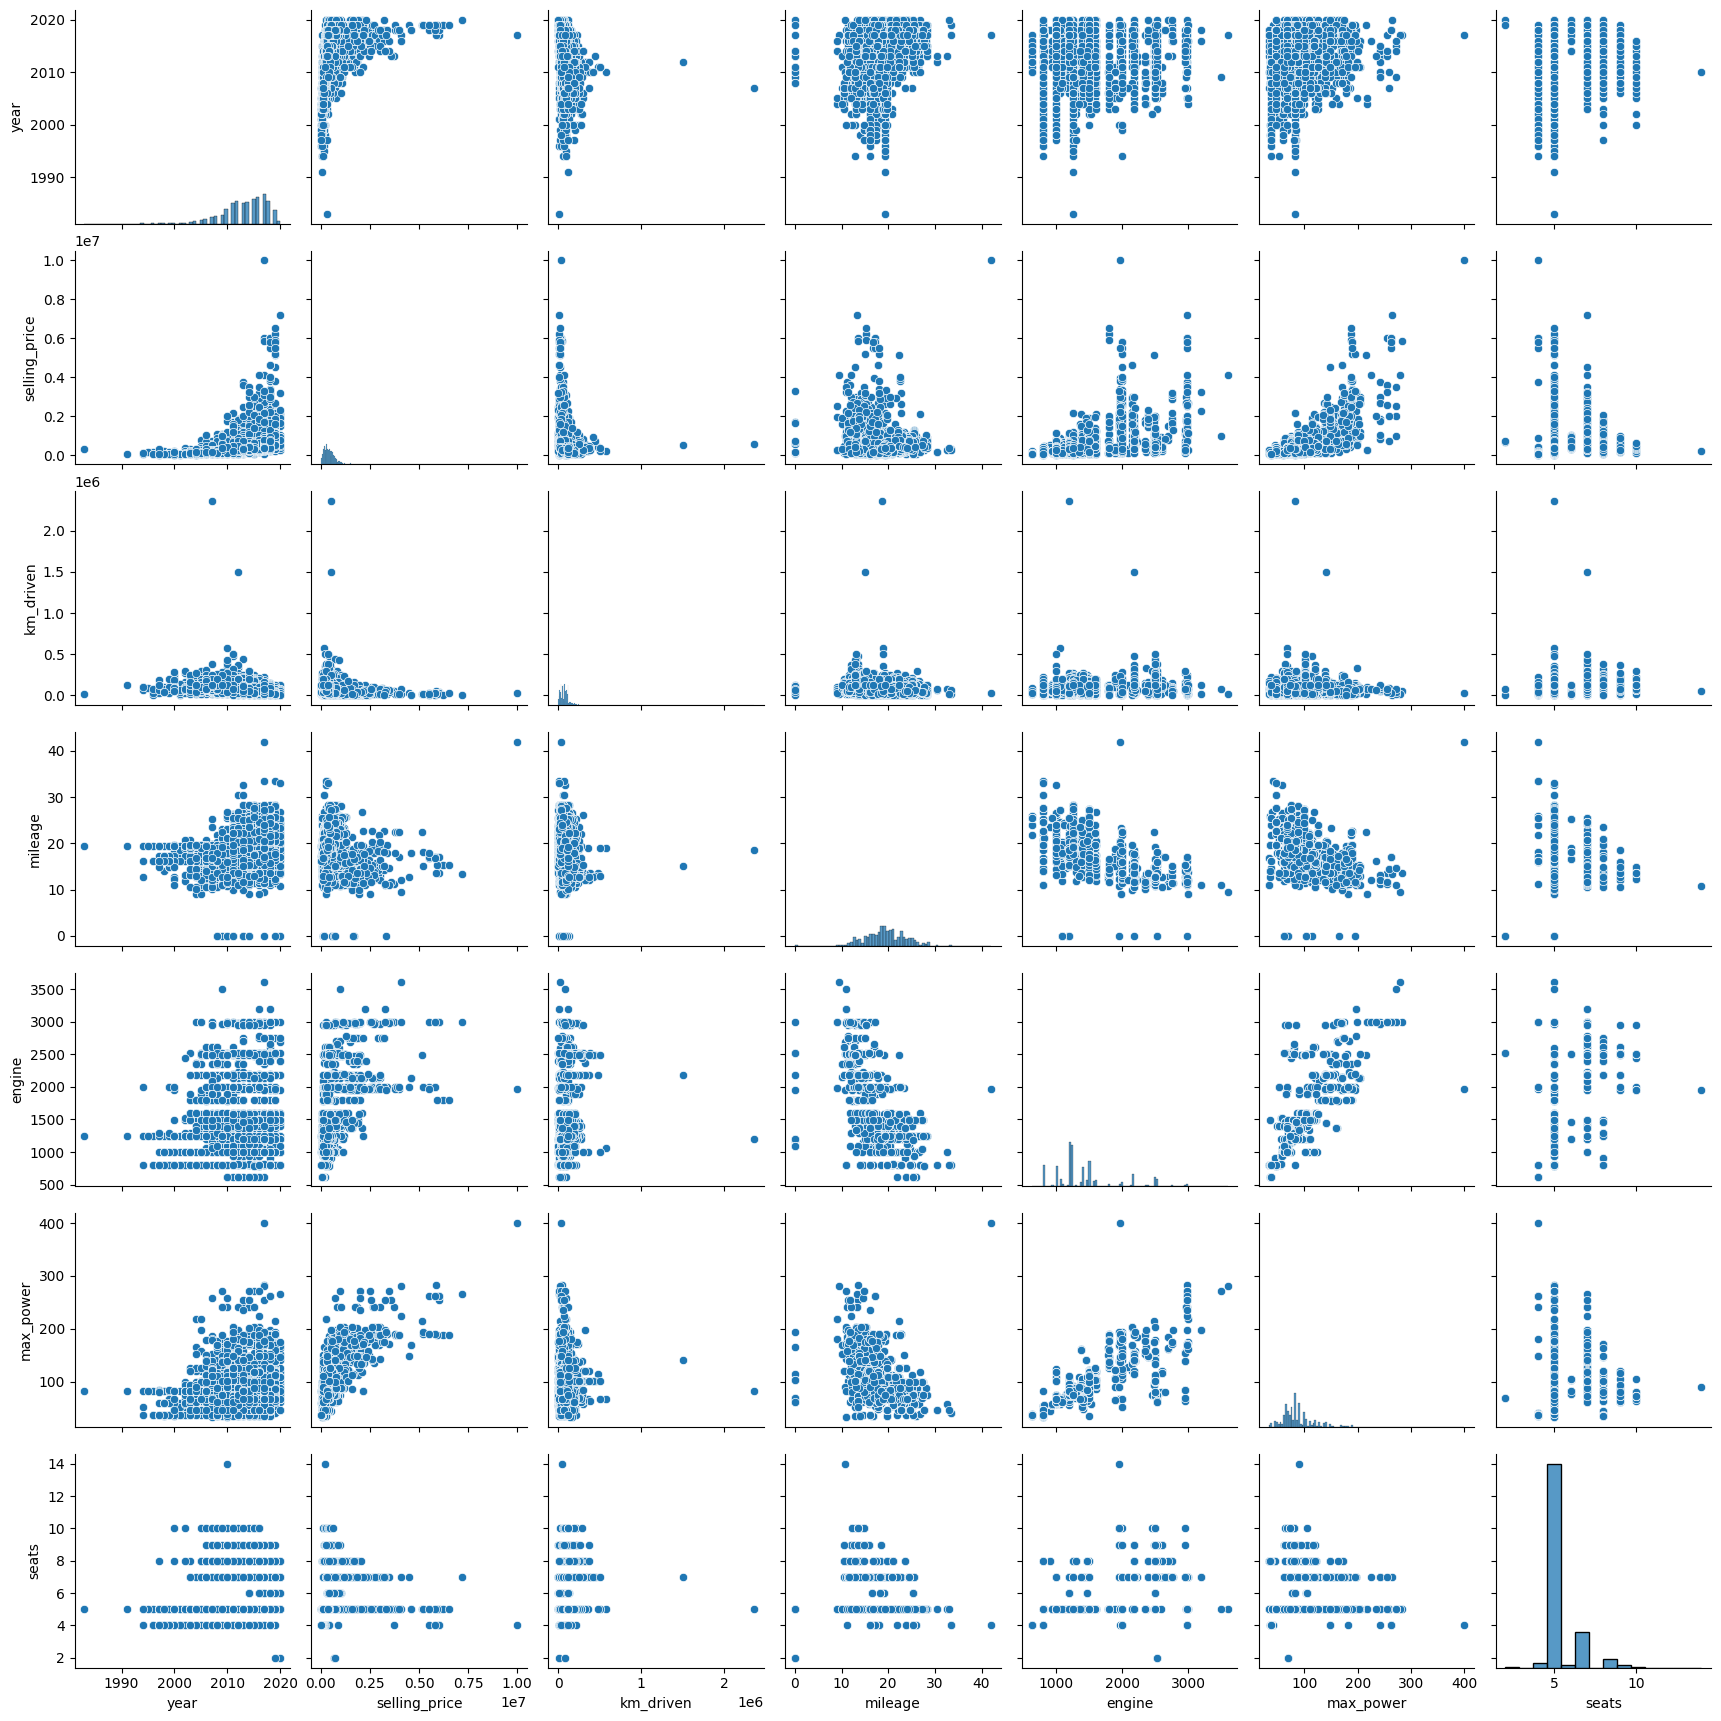

In [300]:
# your code here
plot = sns.pairplot(df_train)
plt.show()

Цена растёт с годом, падает с увеличение km_driven, растёт с увеличением engine и max_power.

engine и max_power явно коррелируют между собой.

Но это и так очевидно)

Остальные графики не такие показательные.

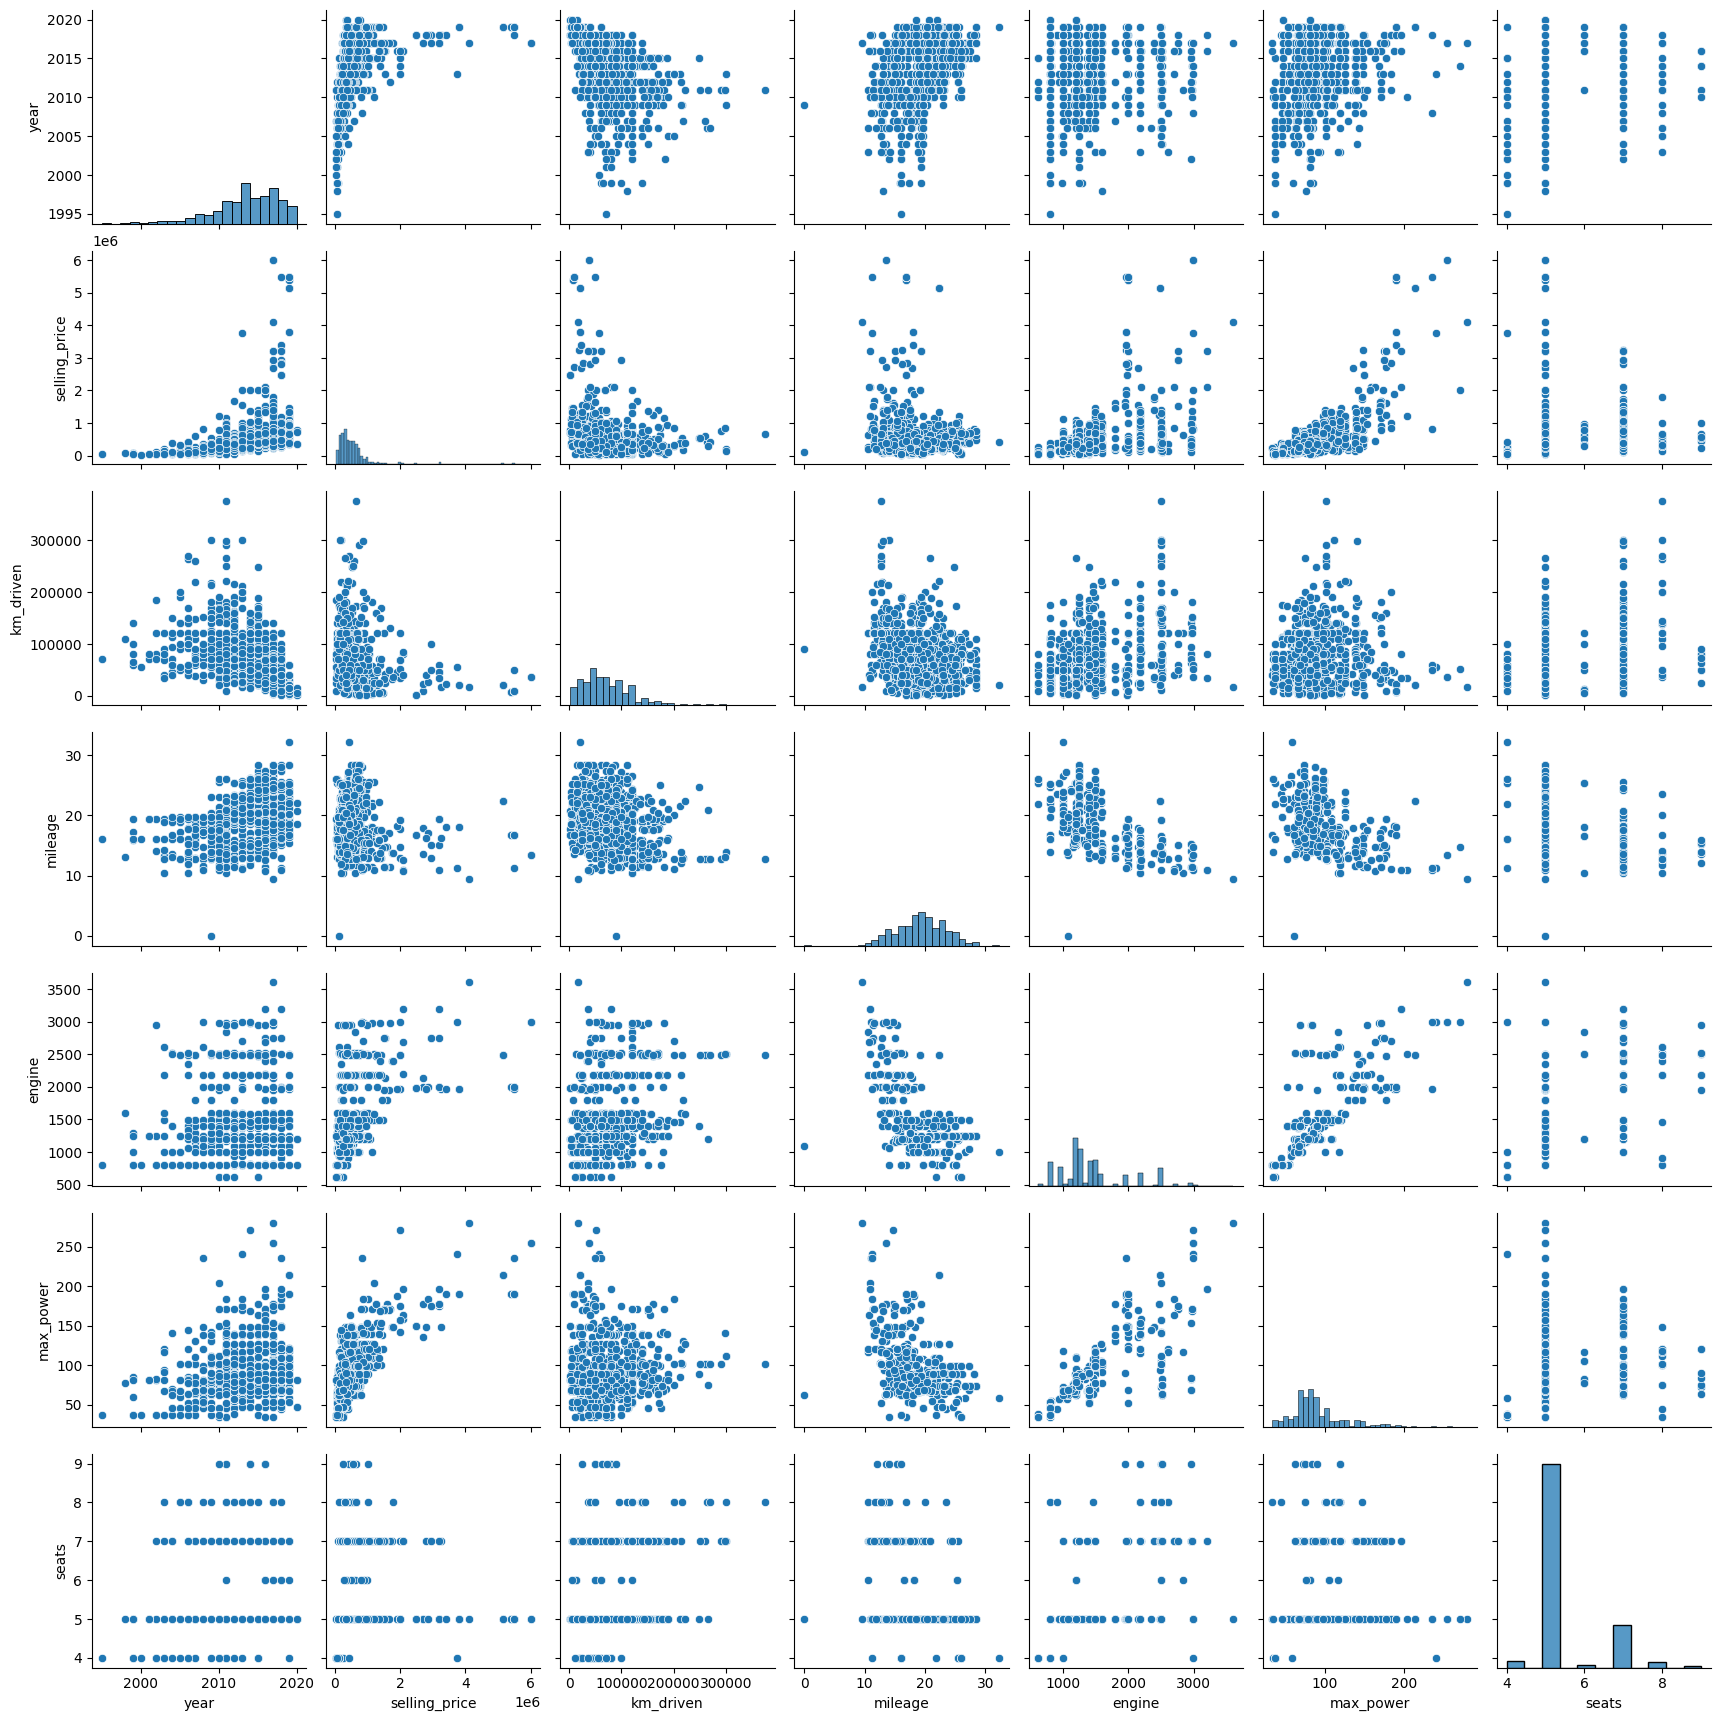

In [301]:
plot = sns.pairplot(df_test)
plt.show()

`Your answer here`
Данные оказались похожими

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


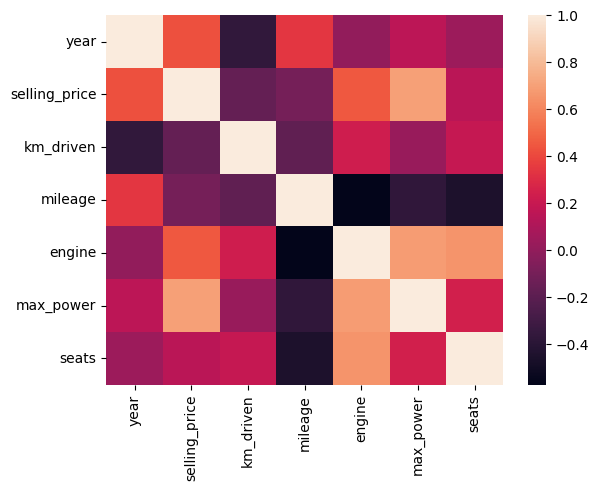

In [302]:
# your code here
corr_df = df_train.corr(numeric_only=True)
sns.heatmap(corr_df)
plt.show()

In [303]:
corr_df

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.341334,0.002819,0.157138,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104769,0.447672,0.693742,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182086,0.229766,0.024539,0.192328
mileage,0.341334,-0.104769,-0.182086,1.000000,-0.572893,-0.374150,-0.451059
engine,0.002819,0.447672,0.229766,-0.572893,1.000000,0.681968,0.652172
max_power,0.157138,0.693742,0.024539,-0.374150,0.681968,1.000000,0.244017
seats,0.041178,0.149953,0.192328,-0.451059,0.652172,0.244017,1.000000


- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

`Your answer here`
1. наименее скоррелированы engine и year
2. engine и max_power, engine и selling_price, selling_price и max_power. А также seats и engine
3. ДА, корреляция отрицательная

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

In [304]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [305]:
y_train = df_train['selling_price']
X_train = df_train[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']]

In [306]:
# опишите выбранные вещественные признаки

In [307]:
y_test = df_test['selling_price']
X_test = df_test[['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']]

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [308]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lreg = LinearRegression()
lreg.fit(X_train, y_train)
y_pred = lreg.predict(X_test)
print("R^2: ", r2_score(y_test, y_pred))
print("MSE: ", MSE(y_test, y_pred))

R^2:  0.5946576472666452
MSE:  233002359160.8032


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [309]:
from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()
stdscaler.fit(X_train)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled = stdscaler.transform(X_test)

lreg = LinearRegression()
lreg.fit(X_train_scaled, y_train)
y_pred = lreg.predict(X_test_scaled)
print("R^2: ", r2_score(y_test, y_pred))
print("MSE: ", MSE(y_test, y_pred))

R^2:  0.5946576472666552
MSE:  233002359160.7975


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [310]:
# your code here
lreg.coef_

array([152247.33086876, -44066.18021284,  29319.18102634,  59324.98036527,
       324496.85782122, -22159.18786684])

Самый информативный max_power, потом year

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [311]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_pred = lasso.predict(X_test_scaled)
print("R^2: ", r2_score(y_test, y_pred))
print("MSE: ", MSE(y_test, y_pred))

R^2:  0.5946564811772821
MSE:  233003029462.26755


In [312]:
lasso.coef_

array([152247.14742736, -44065.05085353,  29317.30055383,  59320.137094  ,
       324497.75189092, -22156.30524519])

Ничего не занулилось из-за того что нет сильной корреляции между признаками и параметр $\alpha$ недостаточно большой

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [313]:
from sklearn.model_selection import GridSearchCV

lasso_ = Lasso()

cv_lasso = GridSearchCV(lasso_, param_grid={'alpha': np.logspace(-4, 6, 50)}, cv=10, scoring='r2', n_jobs=-1, verbose=2)

cv_lasso.fit(X_train_scaled, y_train)

y_pred = cv_lasso.predict(X_test_scaled)

print("R^2: ", r2_score(y_test, y_pred))
print("MSE: ", MSE(y_test, y_pred))

Fitting 10 folds for each of 50 candidates, totalling 500 fits
R^2:  0.5687430261825065
MSE:  247898823368.5162


In [314]:
cv_lasso.best_params_

{'alpha': np.float64(23299.51810515372)}

In [315]:
X_test.head(1)

,year,km_driven,mileage,engine,max_power,seats
0,2010,168000,14.0,2498,112.0,7


In [316]:
cv_lasso.best_estimator_.coef_

array([147494.24058891, -18512.15784727,      0.        ,      0.        ,
       325397.90889749,     -0.        ])

Занулились коэффициенты у engine, mileage, seats. Так как engine, max_power, mileage коррелируют, то что-что их них занулилось, а от seats возможно не сильно зависят, хотя seats и engine тоже неплохо коррелируют. Обучилось быстро (0.1 сек).

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [317]:
from sklearn.linear_model import ElasticNet

elnet = ElasticNet()

cv_elnet = GridSearchCV(elnet, param_grid={'alpha': np.logspace(-4, 2, 100), 'l1_ratio': np.linspace(0, 1, 100)}, cv=10, scoring='r2', n_jobs=-1, verbose=2)

cv_elnet.fit(X_train_scaled, y_train)

y_pred = cv_elnet.predict(X_test_scaled)

print("R^2: ", r2_score(y_test, y_pred))
print("MSE: ", MSE(y_test, y_pred))

Fitting 10 folds for each of 10000 candidates, totalling 100000 fits
R^2:  0.5635087118375495
MSE:  250907656723.18542


In [318]:
cv_elnet.best_estimator_

,alpha,np.float64(14.174741629268048)
,l1_ratio,np.float64(0.98989898989899)
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


alpha 	14.174741629268048

l1_ratio 	0.98989898989899

Обучалось дольше (23.6 сек), но тут и больше fits 100000.

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [319]:
# your code here
df_train = df_train.drop('name', axis=1)
df_test = df_test.drop('name', axis=1)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [320]:
#assert X_train_cat.shape == (5840, 10)

In [321]:
#X_train_cat.describe(include='object')

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [322]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

onehot = OneHotEncoder(drop='first', sparse_output=False)
df_data_encoded = onehot.fit_transform(df_train[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])
columns_names = onehot.get_feature_names_out()
df_train_encoded = pd.DataFrame(df_data_encoded, columns=columns_names)
X_train_encoded = pd.concat([X_train.drop('seats', axis=1), df_train_encoded], axis=1)

df_data_encoded = onehot.transform(df_test[['fuel', 'seller_type', 'transmission', 'owner', 'seats']])
df_test_encoded = pd.DataFrame(df_data_encoded, columns=columns_names)
X_test_encoded = pd.concat([X_test.drop('seats', axis=1), df_test_encoded], axis=1)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [323]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

cv_ridge = GridSearchCV(ridge, param_grid={'alpha': np.logspace(-4, 4, 100)}, cv=10, scoring='r2', n_jobs=-1, verbose=2)

cv_ridge.fit(X_train_encoded, y_train)

y_pred = cv_ridge.predict(X_test_encoded)

print("R^2: ", r2_score(y_test, y_pred))
print("MSE: ", MSE(y_test, y_pred))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
R^2:  0.6449266264444866
MSE:  204106314466.58554


Прогнозы не улучшились

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [329]:
def business_metric(y_true, y_pred):
    relative_errors = np.zeros_like(y_true, dtype=float)
    relative_errors = np.abs(y_true - y_pred) / np.abs(y_true)
    
    within_10_percent = relative_errors <= 0.1
    
    score = np.mean(within_10_percent)
    
    return score

print('Ridge: ', business_metric(y_test, cv_ridge.predict(X_test_encoded)))
print('CV lasso: ', business_metric(y_test, cv_lasso.predict(X_test_scaled)))
print('CV elnet: ', business_metric(y_test, cv_elnet.predict(X_test_scaled)))
print('Base lasso: ', business_metric(y_test, lasso.predict(X_test_scaled)))
print('Base linear regression: ', business_metric(y_test, lreg.predict(X_test_scaled)))

Ridge:  0.242
CV lasso:  0.235
CV elnet:  0.243
Base lasso:  0.224
Base linear regression:  0.224


`Your answer here`
Лучше всего справилась Elastic Net обученная по кросс валидации на 10 фолдах

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.